In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from imblearn import under_sampling as us
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [4]:
data = pd.read_csv('/content/creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
## filling the NaN values
data['V18'].fillna(int(data['V18'].mean()), inplace=True)
data['V19'].fillna(int(data['V19'].mean()), inplace=True)
data['V20'].fillna(int(data['V20'].mean()), inplace=True)
data['V21'].fillna(int(data['V21'].mean()), inplace=True)
data['V22'].fillna(int(data['V22'].mean()), inplace=True)
data['V23'].fillna(int(data['V23'].mean()), inplace=True)
data['V24'].fillna(int(data['V24'].mean()), inplace=True)
data['V25'].fillna(int(data['V25'].mean()), inplace=True)
data['V26'].fillna(int(data['V26'].mean()), inplace=True)
data['V27'].fillna(int(data['V27'].mean()), inplace=True)
data['V28'].fillna(int(data['V28'].mean()), inplace=True)
data['Amount'].fillna(int(data['Amount'].mean()), inplace=True)
data['Class'].fillna(int(data['Class'].mean()), inplace=True)
print(data)

      Time        V1        V2        V3        V4        V5        V6  \
0        0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2        1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3        1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4        2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...    ...       ...       ...       ...       ...       ...       ...   
5969  6634 -1.611463  0.190648  0.901715  1.531254 -1.535865  0.799245   
5970  6635 -1.420272  1.449354  1.320110 -1.894320  0.913695  0.454601   
5971  6637 -1.206696  0.284728  2.152053 -2.850437 -0.437285 -0.238376   
5972  6644  1.067611  0.091006 -0.153917  0.704233  0.113894 -0.826866   
5973  6645 -0.535272 -0.132299  2.180041  1.018303 -1.498819  0.529570   

            V7        V8        V9  ...       V21       V22       V23  \
0     0.239599  0.098698  0.363787  ..

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.isnull().values.any()

False

In [11]:
data.shape

(5974, 31)

Text(0, 0.5, 'Frequency')

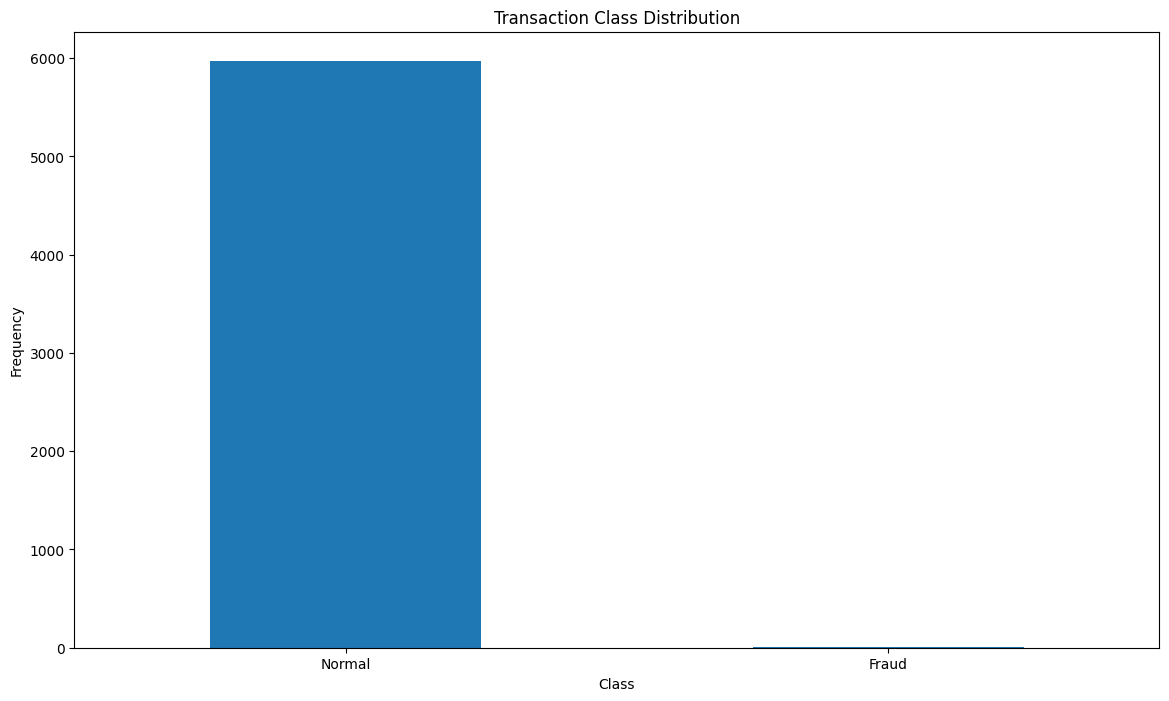

In [12]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [13]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [14]:
print(fraud.shape,normal.shape)

(3, 31) (5971, 31)


We have 3 frauds out of 5971 transactions

In [15]:
## We need to analyze more amount of information from the transaction data
# How different are the amount of money used in different transaction classes
fraud.Amount.describe()

count      3.000000
mean     256.310000
std      264.880121
min        0.000000
25%      119.965000
50%      239.930000
75%      384.465000
max      529.000000
Name: Amount, dtype: float64

In [16]:
normal.Amount.describe()

count    5971.000000
mean       64.965713
std       192.413722
min         0.000000
25%         4.450000
50%        15.620000
75%        56.600000
max      7712.430000
Name: Amount, dtype: float64

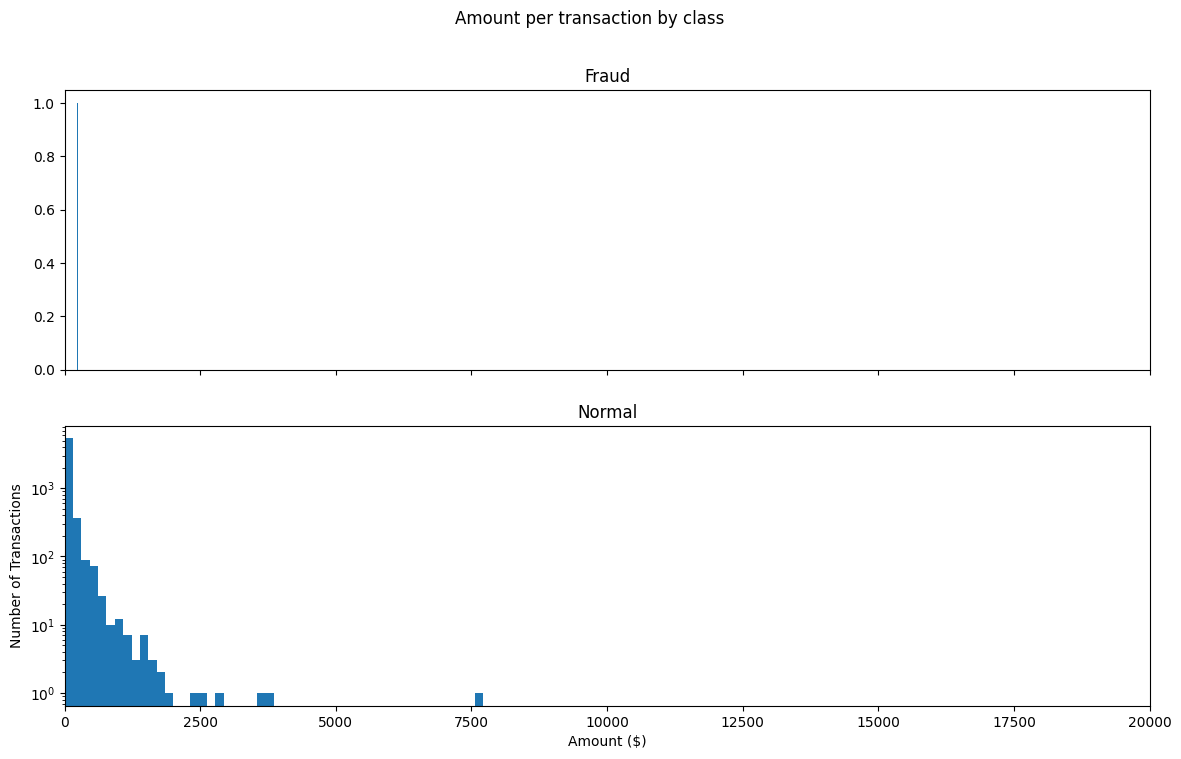

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [18]:
amount = data.groupby('Class')['Amount'].sum()
fraud, unfraud = len(data[data['Class'] == 1]), len(data[data['Class'] == 0])
fraud_perc, unfraud_perc = (fraud/len(data)) * 100 , (unfraud/len(data))*100

Loss = pd.DataFrame({'Fraud' : ['Fraud', 'No Fraud'], 'Total Amount' : [amount[1], amount[0]], 'Freq.' : [fraud, unfraud],
                     '% Perc.' : [fraud_perc, unfraud_perc]})
Loss = Loss.set_index('Fraud')
Loss

,Total Amount,Freq.,% Perc.
Fraud,,,
Fraud,768.93,3,0.050218
No Fraud,387910.27,5971,99.949782


In [25]:
## Take some sample of the data

data1= data.sample(frac = 0.4,random_state=1)

data1.shape

(2390, 31)

In [26]:
Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [27]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0008375209380234506
Fraud Cases : 2
Valid Cases : 2388


In [28]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(2390, 30)
(2390,)


In [29]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

In [30]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 5
Accuracy Score :
0.997907949790795
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2388
         1.0       0.00      0.00      0.00         2

    accuracy                           1.00      2390
   macro avg       0.50      0.50      0.50      2390
weighted avg       1.00      1.00      1.00      2390

Local Outlier Factor: 5
Accuracy Score :
0.997907949790795
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2388
         1.0       0.00      0.00      0.00         2

    accuracy                           1.00      2390
   macro avg       0.50      0.50      0.50      2390
weighted avg       1.00      1.00      1.00      2390

Support Vector Machine: 707
Accuracy Score :
0.7041841004184101
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.

Isolation Forest detected 5 errors versus Local Outlier Factor detecting 5 errors versus SVM detecting 707 errors

Isolation Forest has a 99.72% more accurate than LOF of 99.7% and SVM of 70.41%